In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TIMBER_data.csv')

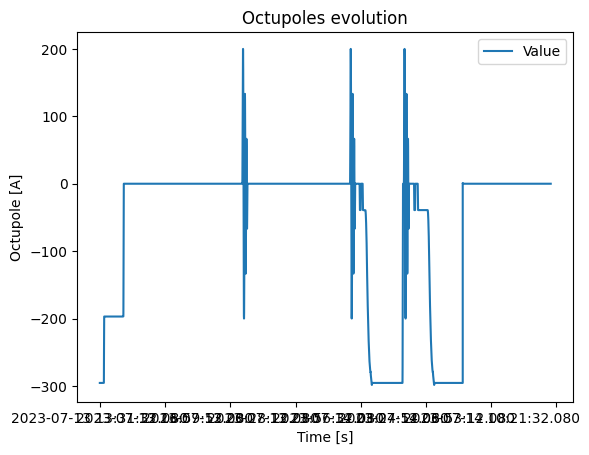

In [3]:
# Plot octupoles evolution
df.plot(x='Timestamp (UTC_TIME)', y=['Value'], title='Octupoles evolution', xlabel='Time [s]', ylabel='Octupole [A]')
plt.show()

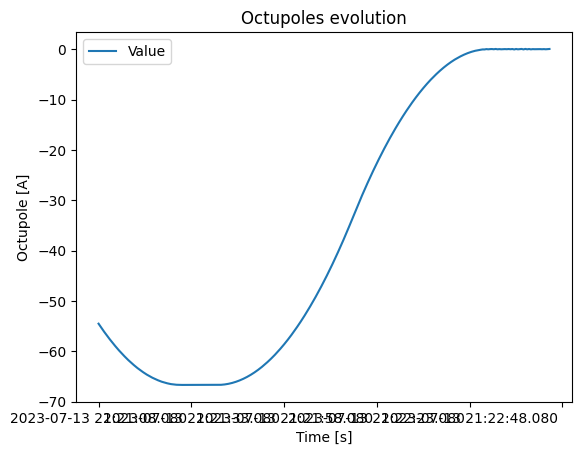

In [4]:
df_isolated = df[((df['Timestamp (UTC_TIME)'] > '2023-07-13 21:21:08') & (df['Timestamp (UTC_TIME)'] < '2023-07-13 21:23:10.080'))]
df_isolated.plot(x='Timestamp (UTC_TIME)', y=['Value'], title='Octupoles evolution', xlabel='Time [s]', ylabel='Octupole [A]')
plt.show()

/tmp/ipykernel_30310/1390859815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isolated['Value'] = df_isolated['Value'] * -1


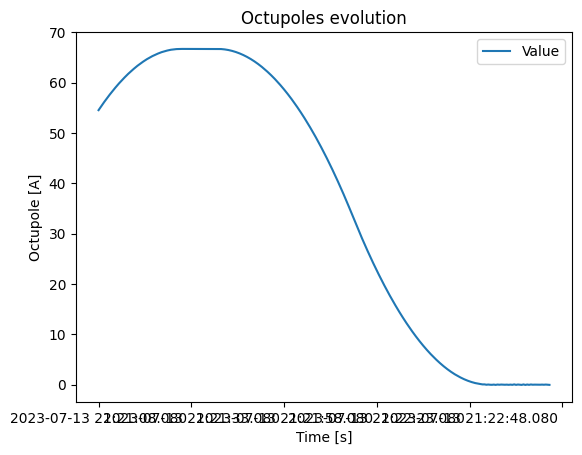

In [5]:
# Reverse value
df_isolated['Value'] = df_isolated['Value'] * -1
df_isolated.plot(x='Timestamp (UTC_TIME)', y=['Value'], title='Octupoles evolution', xlabel='Time [s]', ylabel='Octupole [A]')
plt.show()


In [6]:
# Only take the plot from max octupoles value to end of the cycle
time_stamp_max = df_isolated['Timestamp (UTC_TIME)'][df_isolated['Value'].idxmax()]
df_isolated = df_isolated[df_isolated['Timestamp (UTC_TIME)'] >= time_stamp_max]

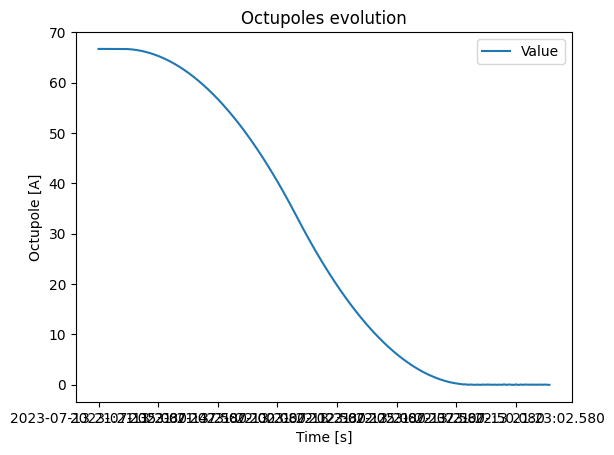

In [7]:
df_isolated.plot(x='Timestamp (UTC_TIME)', y=['Value'], title='Octupoles evolution', xlabel='Time [s]', ylabel='Octupole [A]')
plt.show()

In [8]:
# Convert the time stamps to seconds starting from 0
df_isolated.loc[:,'time'] = pd.to_datetime(df_isolated['Timestamp (UTC_TIME)'])



/tmp/ipykernel_30310/1576997383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isolated.loc[:,'time'] = pd.to_datetime(df_isolated['Timestamp (UTC_TIME)'])


In [9]:
df_isolated.loc[:,'time'] = df_isolated['time'] - df_isolated['time'].iloc[0]


In [10]:
df_isolated.loc[:,'time'] = df_isolated['time'].dt.total_seconds()

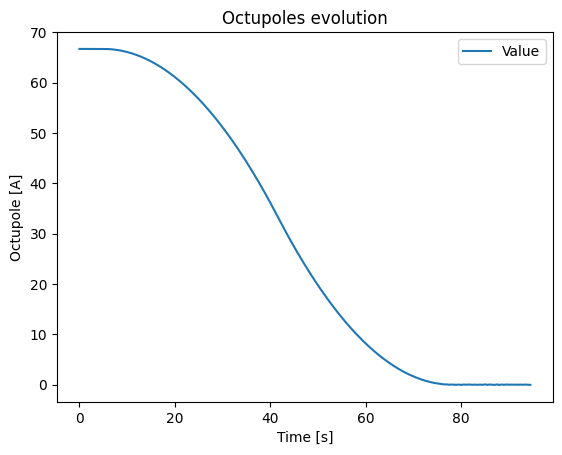

In [11]:
df_isolated.plot(x='time', y=['Value'], title='Octupoles evolution', xlabel='Time [s]', ylabel='Octupole [A]')
plt.show()

In [12]:
# Make the signal symmetric
df_isolated_left = df_isolated.copy()
df_isolated_left['time'] = -df_isolated_left['time']

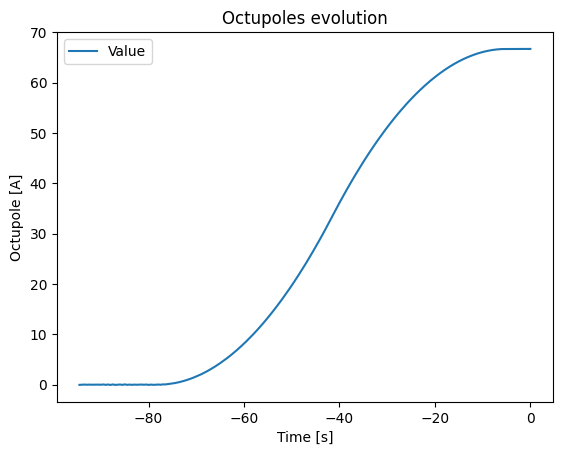

In [13]:
df_isolated_left.plot(x='time', y=['Value'], title='Octupoles evolution', xlabel='Time [s]', ylabel='Octupole [A]')
plt.show()

In [14]:
# Concatenate the two signals and use time as index
df_isolated = pd.concat([df_isolated_left, df_isolated])

# Sort the values by time
df_isolated = df_isolated.sort_values('time')

# Set first timepoint as 0
df_isolated['time'] = df_isolated['time'] + abs(df_isolated['time'].iloc[0])

# Set time as index
df_isolated = df_isolated.set_index('time')

# Sort by increasing index
df_isolated = df_isolated.sort_index()


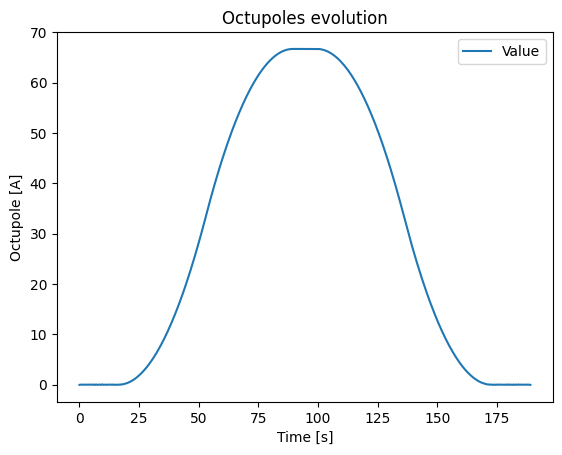

In [15]:
df_isolated.plot(y=['Value'], title='Octupoles evolution', xlabel='Time [s]', ylabel='Octupole [A]')
plt.show()

In [32]:
# Make a polynomial fit of the signal
import numpy as np
p = np.polyfit(df_isolated.index, df_isolated['Value'], 20)
p

/tmp/ipykernel_30310/209650743.py:3: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(df_isolated.index, df_isolated['Value'], 20)


array([-4.19744749e-37,  5.67563456e-34, -3.21947185e-31,  9.40692226e-29,
       -1.21262121e-26, -7.67737513e-25,  4.95950808e-22, -4.72674191e-20,
       -8.80209493e-18,  3.26899234e-15, -4.95407390e-13,  4.62998105e-11,
       -2.88722036e-09,  1.21097516e-07, -3.30047185e-06,  5.27994983e-05,
       -3.41587297e-04, -1.78029947e-03,  3.34413600e-02, -1.12385275e-01,
        5.88024855e-02])

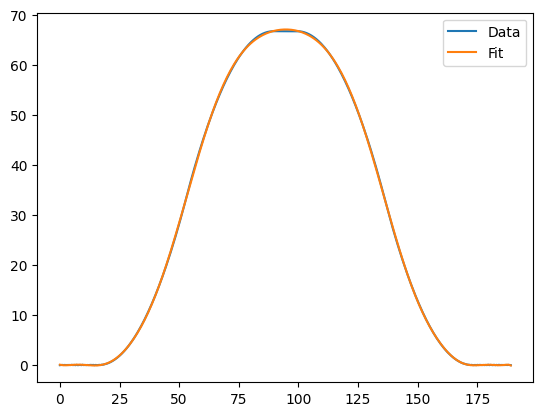

In [33]:
# Plot the fit
plt.plot(df_isolated.index, df_isolated['Value'], label='Data')
plt.plot(df_isolated.index, np.polyval(p, df_isolated.index), label='Fit')
plt.legend()
plt.show()


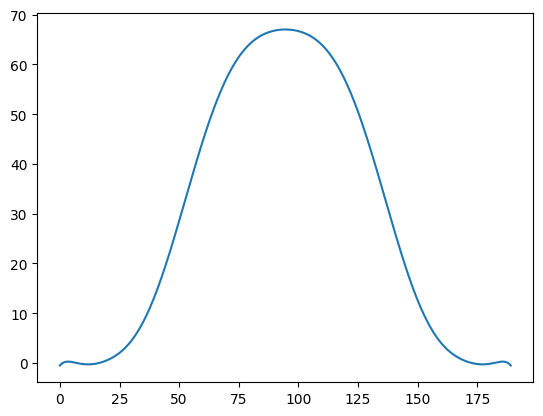

In [31]:

plt.plot(df_isolated.index, p[0]*df_isolated.index**12 + p[1]*df_isolated.index**11 + p[2]*df_isolated.index**10 + p[3]*df_isolated.index**9 + p[4]*df_isolated.index**8 + p[5]*df_isolated.index**7 + p[6]*df_isolated.index**6 + p[7]*df_isolated.index**5 + p[8]*df_isolated.index**4 + p[9]*df_isolated.index**3 + p[10]*df_isolated.index**2 + p[11]*df_isolated.index + p[12], label='Fit')   

In [18]:
df_isolated.index

Index([  0.0,   0.5,   1.0,   1.5,   2.0,   2.5,   3.0,   3.5,   4.0,   4.5,
       ...
       184.5, 185.0, 185.5, 186.0, 186.5, 187.0, 187.5, 188.0, 188.5, 189.0],
      dtype='float64', name='time', length=380)